In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def naive_matrix_mult(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C


In [3]:
def strassen_matrix_mult(A, B):
    n = A.shape[0]
    if n == 1:
        return A * B
    elif n <= 64:
        # Umbral: usar naive para tamaños pequeños para evitar overhead
        return naive_matrix_mult(A, B)

    mid = n // 2

    A11, A12 = A[:mid, :mid], A[:mid, mid:]
    A21, A22 = A[mid:, :mid], A[mid:, mid:]
    B11, B12 = B[:mid, :mid], B[:mid, mid:]
    B21, B22 = B[mid:, :mid], B[mid:, mid:]

    M1 = strassen_matrix_mult(A11 + A22, B11 + B22)
    M2 = strassen_matrix_mult(A21 + A22, B11)
    M3 = strassen_matrix_mult(A11, B12 - B22)
    M4 = strassen_matrix_mult(A22, B21 - B11)
    M5 = strassen_matrix_mult(A11 + A12, B22)
    M6 = strassen_matrix_mult(A21 - A11, B11 + B12)
    M7 = strassen_matrix_mult(A12 - A22, B21 + B22)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    top = np.hstack((C11, C12))
    bottom = np.hstack((C21, C22))
    return np.vstack((top, bottom))


In [4]:
def time_function(func, A, B):
    start = time.time()
    _ = func(A, B)
    end = time.time()
    return end - start


In [9]:
sizes = [32, 64, 96, 128, 256, 512]
naive_times = []
strassen_times = []

for n in sizes:
    print(f"Processing size {n}x{n}...")
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    
    t_naive = time_function(naive_matrix_mult, A, B)
    t_strassen = time_function(strassen_matrix_mult, A, B)
    
    naive_times.append(t_naive)
    strassen_times.append(t_strassen)


Processing size 32x32...
Processing size 64x64...
Processing size 96x96...
Processing size 128x128...
Processing size 256x256...
Processing size 512x512...


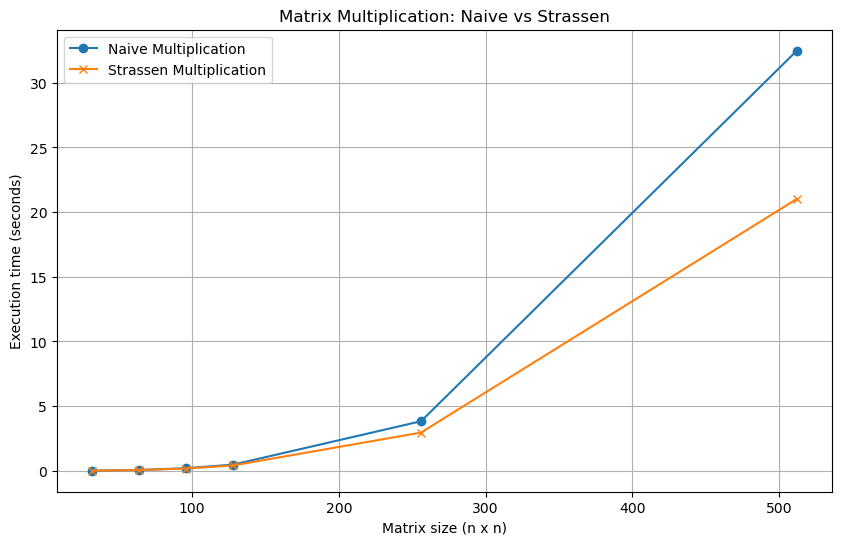

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(sizes, naive_times, marker='o', label="Naive Multiplication")
plt.plot(sizes, strassen_times, marker='x', label="Strassen Multiplication")
plt.xlabel("Matrix size (n x n)")
plt.ylabel("Execution time (seconds)")
plt.title("Matrix Multiplication: Naive vs Strassen")
plt.grid(True)
plt.legend()
plt.show()


In [11]:
print(naive_times)

[0.011067867279052734, 0.06982803344726562, 0.20406675338745117, 0.4811089038848877, 3.833923816680908, 32.47424125671387]


In [12]:
print(strassen_times)

[0.009537696838378906, 0.06269216537475586, 0.180588960647583, 0.41817498207092285, 2.958810806274414, 21.015389919281006]


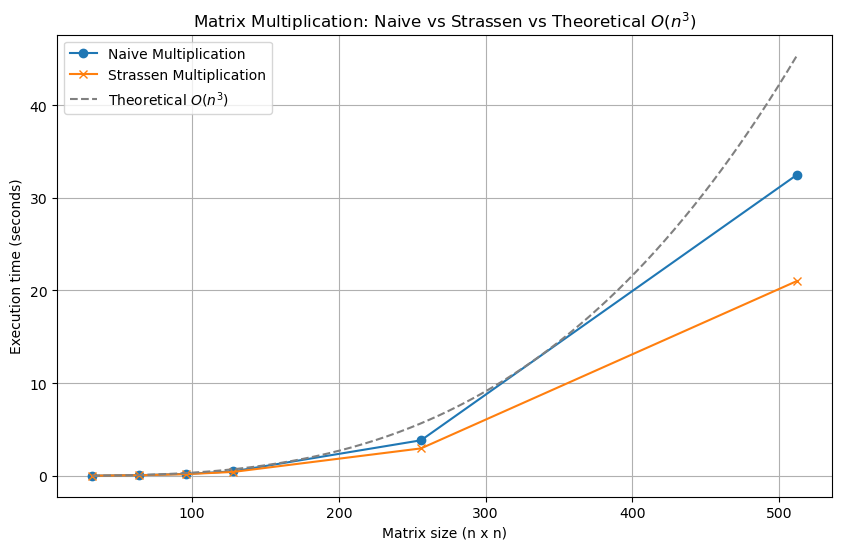

In [14]:
sizes_np = np.array(sizes)
naive_times_np = np.array(naive_times)
strassen_times_np = np.array(strassen_times)

# Creamos un rango más fino de tamaños para suavizar la curva
smooth_sizes = np.linspace(sizes_np.min(), sizes_np.max(), 300)

# Curva teórica suavizada de O(n^3), escalada al primer punto
theoretical_smooth = (smooth_sizes ** 3)
theoretical_smooth = theoretical_smooth / theoretical_smooth[0] * naive_times_np[0]

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(sizes_np, naive_times_np, marker='o', label="Naive Multiplication")
plt.plot(sizes_np, strassen_times_np, marker='x', label="Strassen Multiplication")
plt.plot(smooth_sizes, theoretical_smooth, linestyle='--', color='gray', label=r"Theoretical $O(n^3)$")

plt.xlabel("Matrix size (n x n)")
plt.ylabel("Execution time (seconds)")
plt.title("Matrix Multiplication: Naive vs Strassen vs Theoretical $O(n^3)$")
plt.grid(True)
plt.legend()
plt.show()